## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:

def build_mlp(input_shape, num_class=10, dropout_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.models.Input(input_shape)
    x = keras.layers.Dense(units=512, activation='relu', name='hidden_layer1')(input_layer)
    x = keras.layers.Dropout(dropout_ratio)(x)
    x = keras.layers.Dense(units=256, activation='relu', name='hidden_layer2')(x)
    x = keras.layers.Dropout(dropout_ratio)(x)
    x = keras.layers.Dense(units=128, activation='relu', name='hidden_layer3')(x)
    x = keras.layers.Dropout(dropout_ratio)(x)
    x = keras.layers.Dense(units=64, activation='relu', name='hidden_layer4')(x)
    x = keras.layers.Dropout(dropout_ratio)(x)
    
    out = keras.layers.Dense(units=num_class, activation='softmax', name='output')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.65]

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], dropout_ratio=drop_ratio)
    opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

    exp_msg = 'exp_drop_%s' % str(drop_ratio) 
    results[exp_msg] = {'loss': model.history.history['loss'],
                        'val_loss': model.history.history['val_loss'],
                        'accuracy': model.history.history['accuracy'],
                        'val_accuracy': model.history.history['val_accuracy']
                       }

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.1512 - accuracy: 0.1922 - val_loss: 1.9166 - val_accuracy: 0.3060
Epoch 2/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9604 - accuracy: 0.2784 - val_loss: 1.8273 - val_accuracy: 0.3406
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8877 - accuracy: 0.3117 - val_loss: 1.7757 - val_accuracy: 0.3629
Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8583 - accuracy: 0.3252 - val_loss: 1.7605 - val_accuracy: 0.3608
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8229 - accuracy: 0.3390 - val_loss: 1.7405 - val_accuracy: 0.3810
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8004 - accuracy: 0.3456 - val_loss: 1.7156 - val_accuracy: 0.3820
Epoch 7/50
50000/50000 [==============================] - 3s 69us/st

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.2852 - accuracy: 0.1376 - val_loss: 2.1848 - val_accuracy: 0.1897
Epoch 2/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1697 - accuracy: 0.1594 - val_loss: 2.1538 - val_accuracy: 0.1774
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.1441 - accuracy: 0.1676 - val_loss: 2.1589 - val_accuracy: 0.1781
Epoch 4/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1243 - accuracy: 0.1717 - val_loss: 2.1437 - val_accuracy: 0.1749
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1116 - accuracy: 0.1767 - val_loss: 2.1455 - val_accuracy: 0.1757
Epoch 6/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.0918 - accuracy: 0.1835 - val_loss: 2.1011 - val_accuracy: 0.1800
Epoch 7/50
50000/50000 [==============================] - 4s 70us/st

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3664 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 70us/st

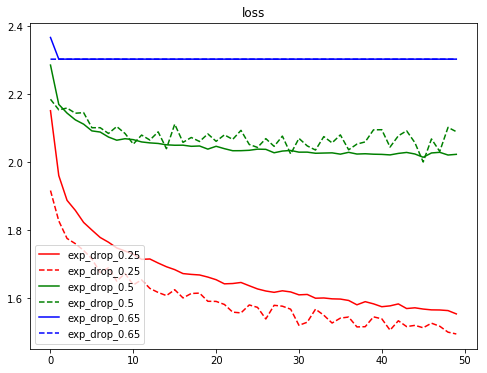

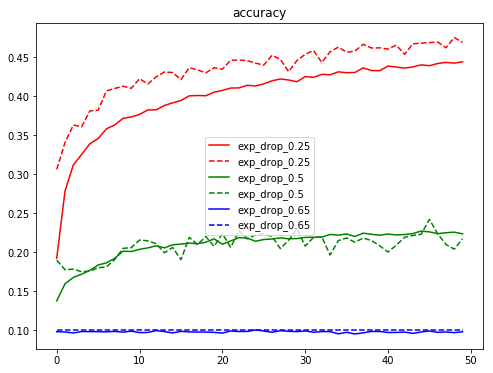

In [25]:
# Adam
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['accuracy'])), results[cond]['accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '--', label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()

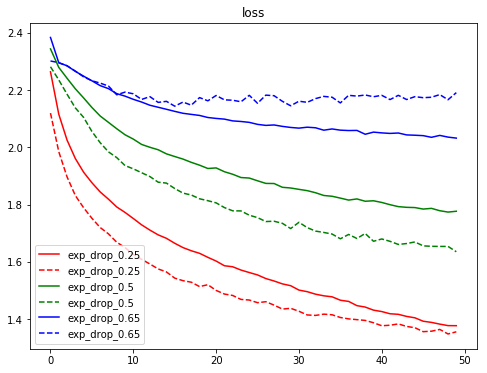

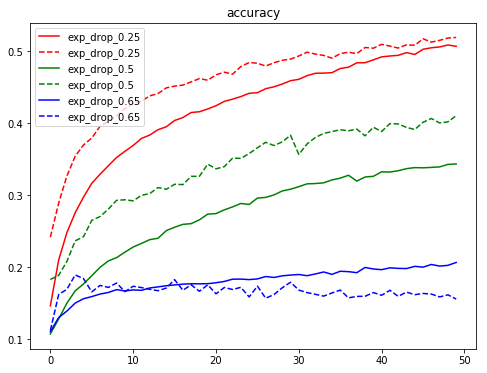

In [23]:
#SGD
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['accuracy'])), results[cond]['accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val_accuracy'])), results[cond]['val_accuracy'], '--', label=cond, color=color_bar[i])
plt.title('accuracy')
plt.legend()
plt.show()